# Detroit Open Demolitions 
### Public X Design Workshop, Detroit Sep, 2018 
#### We are Avigail Vantu (avigailvantu@gmail.com) & Eitan Akman (eitanakman@gmail.com), we are both cities, tech and data enthusiastic based in Brookyln, NY and are very excited to be visting Detroit. 

Hey there! Welcome to our workshop. You can be a Detroit resident or a visitor to participate, no prior technical knowledge is needed to participate. Today we want to use data to better understand Detroit's demolitions policies. All of the data we will be working on in these session is released as open data - meaning it is accessible online for everyone to use. In particular, Detroit's Open Data Portal was used in this notebook descriptives and analysis: https://data.detroitmi.gov/ 

iPython notebook in a nuteshell: 
- input and output 
- running a cell shift + returen 
- 

### To get a better understanding of our topic and the magntute of the issue, here is the distribution of demolitions in Detroit by Neighborhood 2014 - 2018

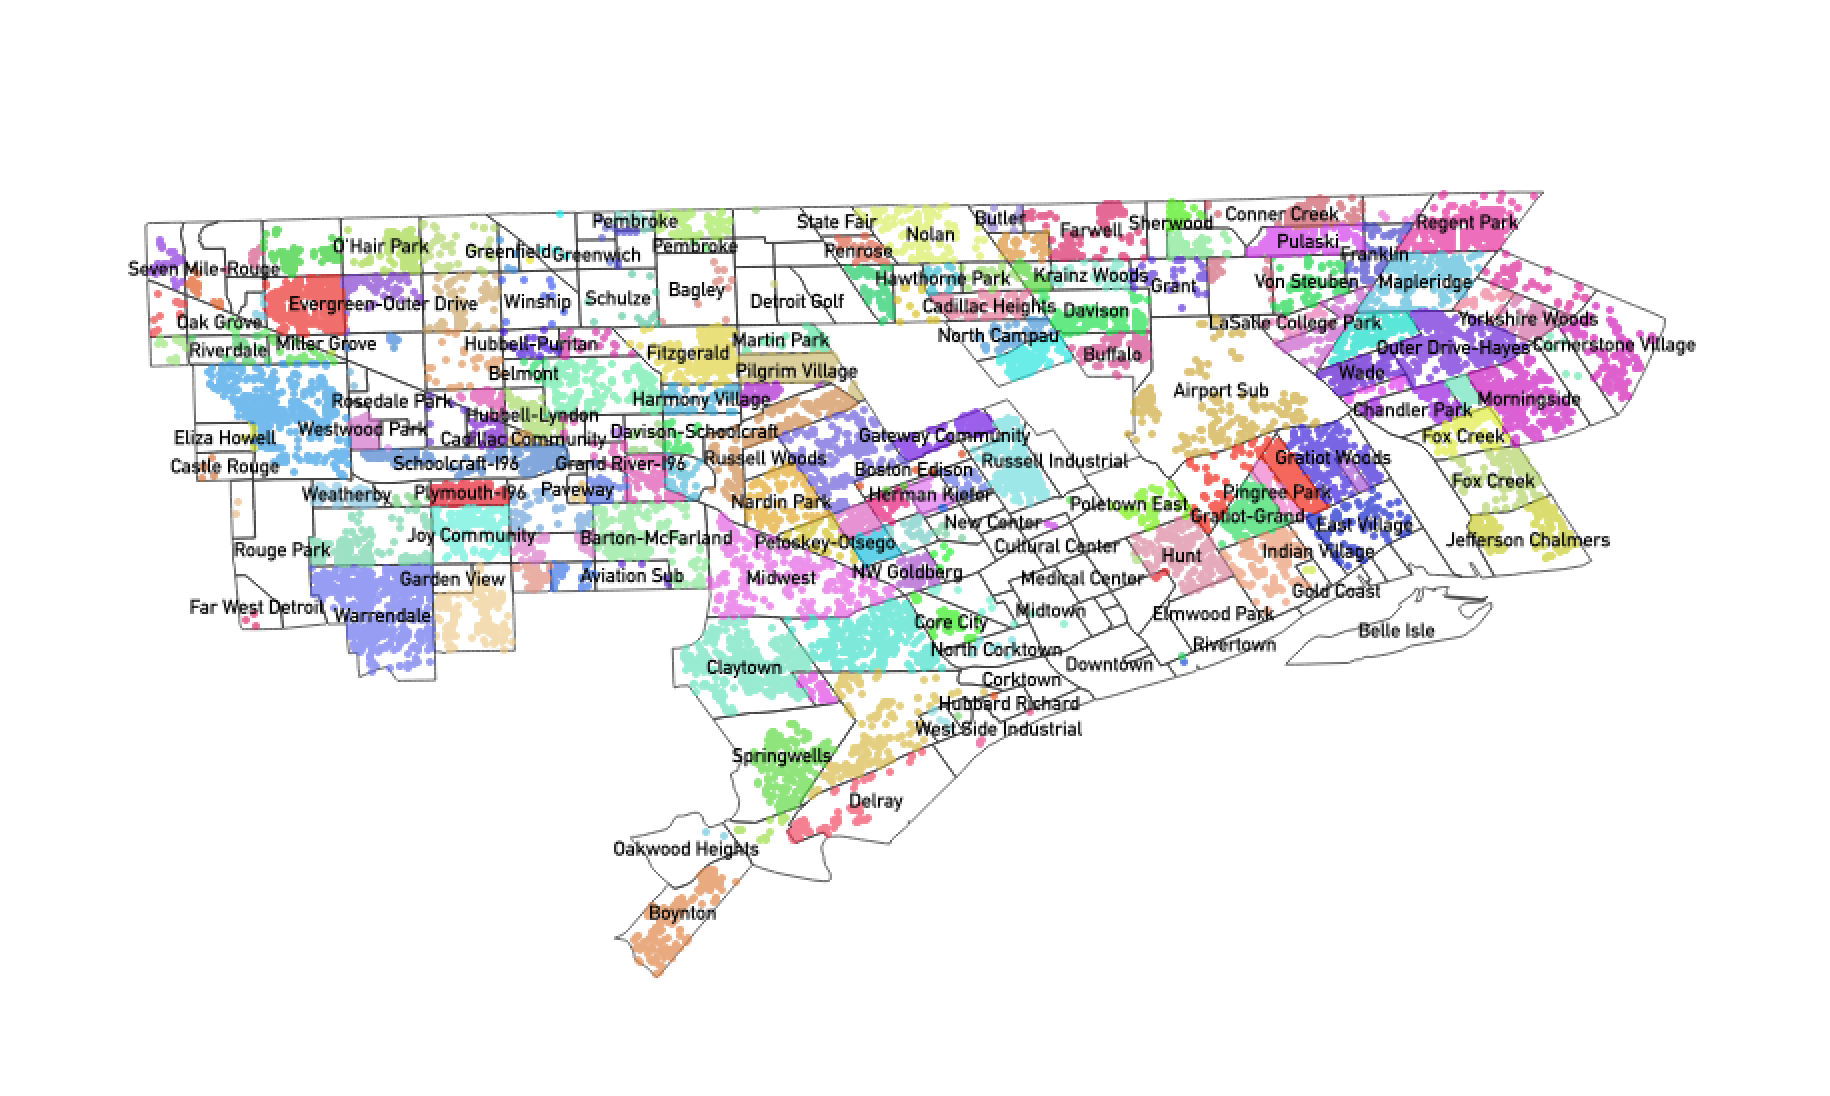

In [122]:
from IPython.display import Image
Image(filename='TotalDemoPerNighDetroit.png')


In [123]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

### Read datasets

In [124]:
#det_prob = pd.read_csv('Improve_Detroit_Issues.csv')
demolitions = pd.read_csv('Detroit_Demolitions.csv')
# crime16 = pd.read_csv('DPD__All_Crime_Incidents__December_6__2016_-_Present.csv')
# crimeOld = pd.read_csv('DPD__All_Crime_Incidents__January_1__2009_-_December_6__2016.csv')

In [125]:
len(demolitions)

14524

### Data Cleaning 

In [126]:
# remove NaN's  
demolitions = demolitions.dropna()

<h1> Demolitions Cost </h1>

In [127]:
print ("The total price of demolitions in US dollar is $" + str(demolitions['Price'].sum() / 1000000)+"M")

The total price of demolitions in US dollar is $228.31201243M


In [128]:
#  (detmolitions[detmolitions['Neighborhood'] == 'Claytown']).groupby(['Price']).sum()
# group.by neighbohood
dem = demolitions.groupby(['Neighborhood']).sum()

### dem is a DF with USD spent on demolitions by neighborhood 

In [129]:
dem.head()

,Price,Council_District,Latitude,Longitude
Neighborhood,,,,
Airport Sub,3942161.75,714,9242.481514,-18099.234705
Aviation Sub,64718.40,28,169.423262,-332.650528
Bagley,167511.00,20,424.264473,-831.466834
Barton-McFarland,3174172.63,1340,8133.953885,-15967.729907
Belmont,105975.52,8,339.250492,-665.528861


In [130]:



 #data.groupby(['col1', 'col2']).mean()
del dem['Council_District']
del dem['Latitude']
del dem['Longitude']


dem.head()

,Price
Neighborhood,
Airport Sub,3942161.75
Aviation Sub,64718.40
Bagley,167511.00
Barton-McFarland,3174172.63
Belmont,105975.52


In [131]:
#dem.drop(['Council_District', 'Latitude', 'Longitude'], axis=1)


In [132]:
dem['Neighborhood'] = dem.index

In [133]:
dem = dem.sort_values(by='Price')

In [134]:
dem = dem.tail(30)

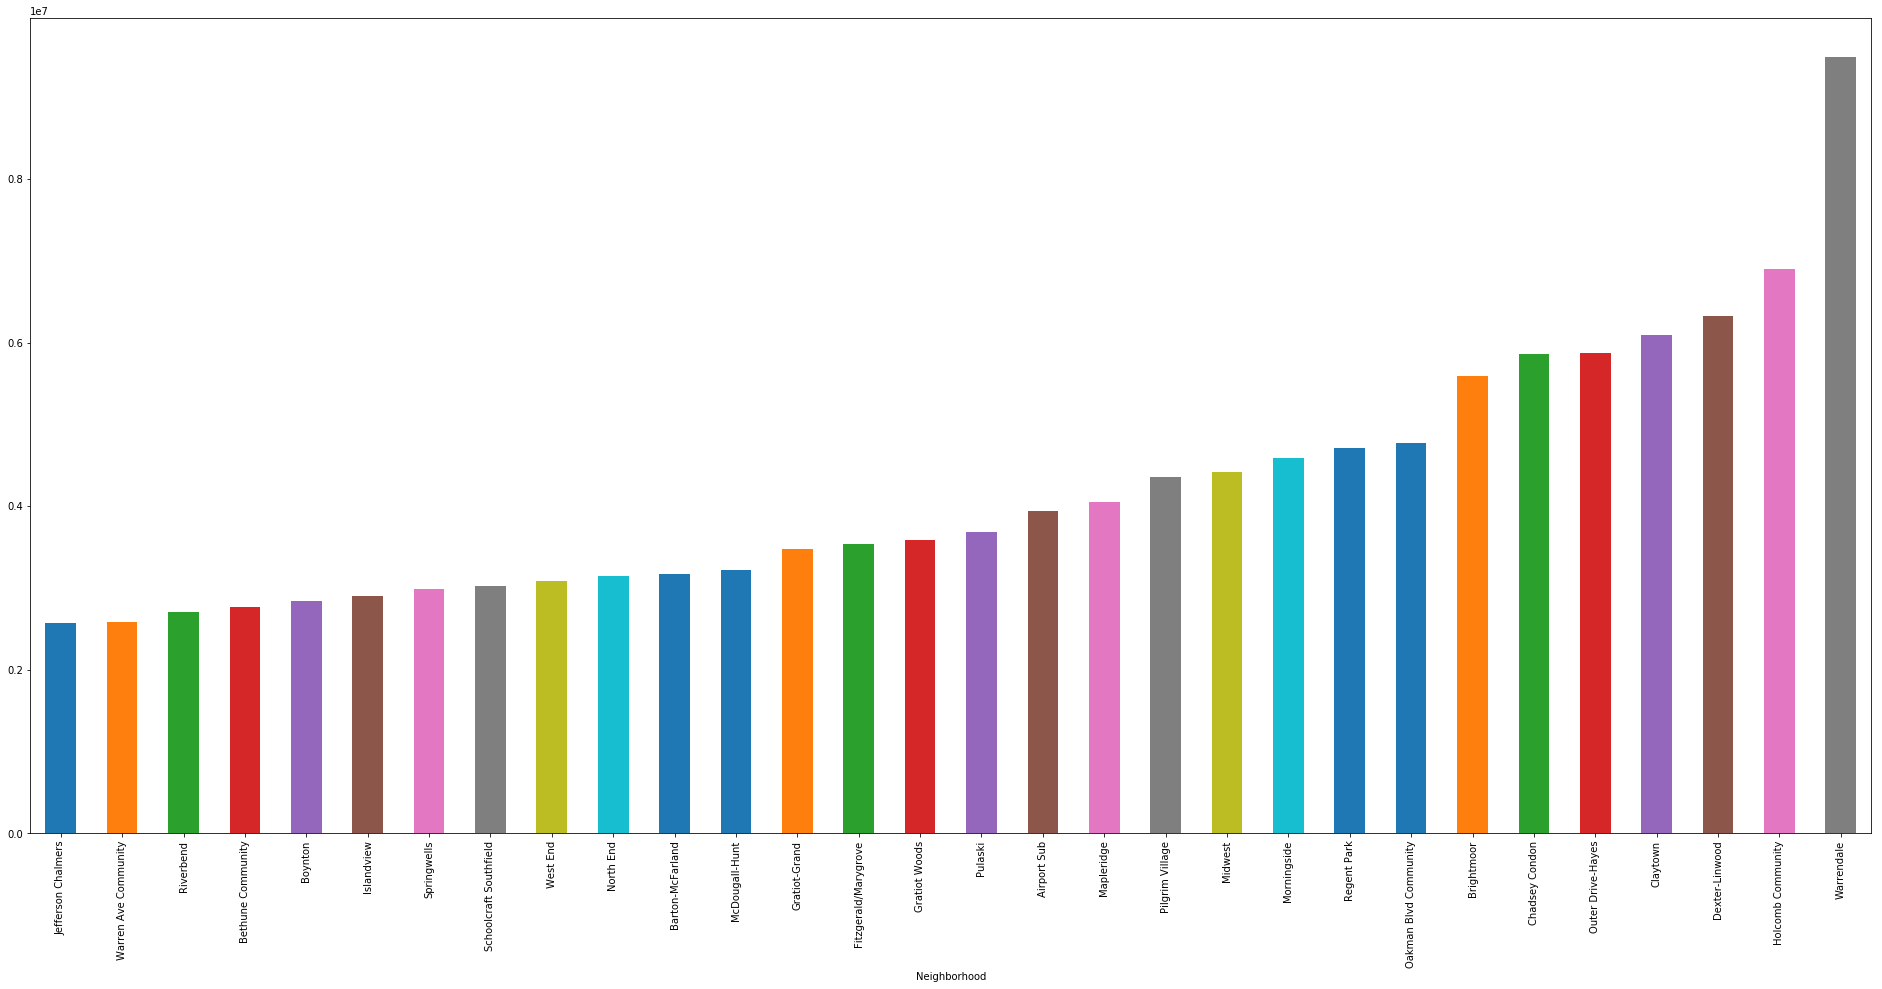

In [135]:
plt.figure(figsize=(33,15))
dem['Price'].plot.bar(stacked=False)

plt.show()

In [136]:
demolitions['Primary_Funding_Source'] =  demolitions['Primary Funding Source']

In [137]:
# seperate df : nonUHF and UHF funds
nonHHFdem = (demolitions[demolitions['Primary_Funding_Source']== 'Non-HHF'])
HHFdem = (demolitions[demolitions['Primary_Funding_Source']== 'HHF'])                     
print (len(nonHHFdem))
print (len(HHFdem))
print (len(demolitions))
#(comp[comp['BoroughID']== 1])

3918
10606
14524


In [138]:
print (HHFdem.head(2))
print (nonHHFdem.head(2))

            Address  Parcel ID  Contractor Name    Price  \
14   211 Trowbridge  01003322.  Able Demolition  15049.0   
15  16700 Evergreen  22095679.  DMC Consultants   7861.4   

   Primary Funding Source Demolition Date Commercial Building  \
14                    HHF      09/10/2014                  No   
15                    HHF      06/03/2014                  No   

    Council_District         Neighborhood   Latitude  Longitude  \
14                 5    Gateway Community  42.390861 -83.083073   
15                 1  North Rosedale Park  42.411668 -83.237590   

                             Location Primary_Funding_Source  
14  location\n(42.390861, -83.083073)                    HHF  
15   location\n(42.411668, -83.23759)                    HHF  
       Address  Parcel ID Contractor Name    Price Primary Funding Source  \
0  6754 W Fort  18000464.         Smalley  23800.0                Non-HHF   
1  5528 Martin  18011033.         Smalley  18500.0                Non-HHF   



In [139]:
# grouop.by contracor name for NHF and nonNHF funded 
nonHHFdem = nonHHFdem.groupby(['Contractor Name']).sum()
HHFdem = HHFdem.groupby(['Contractor Name']).sum()

In [140]:
# remove columns , only keep price 
del nonHHFdem['Council_District']
del nonHHFdem['Latitude']
del nonHHFdem['Longitude']


del HHFdem['Council_District']
del HHFdem['Latitude']
del HHFdem['Longitude']


In [141]:
print (nonHHFdem.head(4))
print (HHFdem.head(4))

                            Price
Contractor Name                  
1 Way Service          3189257.00
313 Construction, LLC    38817.77
ABC Demolition          329395.00
Able Demolition        9371192.70
                             Price
Contractor Name                   
313 Construction, LLC    464818.61
ABC Demolition          5197899.00
Able Demolition        13512933.68
Adamo Group, Inc.      40280635.38


In [142]:
nonHHFdem['PriceNonHHF'] = nonHHFdem['Price']
HHFdem['PriceHHF'] = HHFdem['Price']

In [143]:
print (nonHHFdem.head(10))
print (HHFdem.head(4))

                                        Price  PriceNonHHF
Contractor Name                                           
1 Way Service                      3189257.00   3189257.00
313 Construction, LLC                38817.77     38817.77
ABC Demolition                      329395.00    329395.00
Able Demolition                    9371192.70   9371192.70
Adamo Group, Inc.                 12295740.33  12295740.33
BBEK Environmental                   10000.00     10000.00
Blackstar                            15400.00     15400.00
Blue Star                          3076100.00   3076100.00
Brown & Glo Wrecking                212847.00    212847.00
Brown Environmental Construction   2583315.90   2583315.90
                             Price     PriceHHF
Contractor Name                                
313 Construction, LLC    464818.61    464818.61
ABC Demolition          5197899.00   5197899.00
Able Demolition        13512933.68  13512933.68
Adamo Group, Inc.      40280635.38  40280635.38


In [144]:
#index to column 
nonHHFdem['Contractor_Name'] = nonHHFdem.index
HHFdem['Contractor_Name'] = HHFdem.index

In [145]:
demHHF_merged = pd.merge(nonHHFdem, HHFdem , on = 'Contractor_Name', how = "inner")

In [146]:
demHHF_merged.head()

,Price_x,PriceNonHHF,Contractor_Name,Price_y,PriceHHF
0,38817.77,38817.77,"313 Construction, LLC",464818.61,464818.61
1,329395.00,329395.00,ABC Demolition,5197899.00,5197899.00
2,9371192.70,9371192.70,Able Demolition,13512933.68,13512933.68
3,12295740.33,12295740.33,"Adamo Group, Inc.",40280635.38,40280635.38
4,3076100.00,3076100.00,Blue Star,3937099.00,3937099.00


In [147]:
del demHHF_merged['Price_x']
del demHHF_merged['Price_y']

In [148]:
demHHF_merged.head()

,PriceNonHHF,Contractor_Name,PriceHHF
0,38817.77,"313 Construction, LLC",464818.61
1,329395.00,ABC Demolition,5197899.00
2,9371192.70,Able Demolition,13512933.68
3,12295740.33,"Adamo Group, Inc.",40280635.38
4,3076100.00,Blue Star,3937099.00


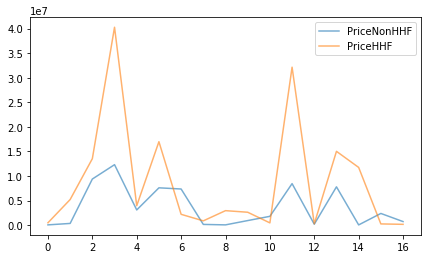

In [149]:
demHHF_merged.plot(alpha=0.6,figsize = (7,4))
#demUHF_merged.plot(c='k',marker='.',ax=ax, alpha=0.6)
#plt.show()



plt.show()

In [152]:
demolitions.head()

,Address,Parcel ID,Contractor Name,Price,Primary Funding Source,Demolition Date,Commercial Building,Council_District,Neighborhood,Latitude,Longitude,Location,Primary_Funding_Source
0,6754 W Fort,18000464.,Smalley,23800.0,Non-HHF,07/19/2018,No,6,Delray,42.304381,-83.109600,"location\n(42.304381, -83.1096)",Non-HHF
1,5528 Martin,18011033.,Smalley,18500.0,Non-HHF,07/11/2018,No,6,Claytown,42.338227,-83.132268,"location\n(42.338227, -83.132268)",Non-HHF
2,4462 33rd St,16012357.,DMC Consultants,17850.0,Non-HHF,07/23/2018,No,6,Chadsey Condon,42.336451,-83.114124,"location\n(42.336451, -83.114124)",Non-HHF
3,3100 E Seven Mile,13008335-9,Den-Man Contractors,54650.0,Non-HHF,04/30/2018,Yes,3,Conant Gardens,42.432757,-83.070501,"location\n(42.432757, -83.070501)",Non-HHF
4,26181 W Outer Drive,20018839.,DMC Consultants,14890.0,Non-HHF,04/17/2018,No,6,Boynton,42.259794,-83.165767,"location\n(42.259794, -83.165767)",Non-HHF


In [153]:
# Demolitions DF to GeoDF 

from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(demolitions.Longitude, demolitions.Latitude)]
demolitions = demolitions.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}
#detmolitions = detmolitions.to_crs({'init': 'epsg:26918'})
gdf = GeoDataFrame(demolitions, crs=crs, geometry=geometry)

In [155]:
DetroitNeighborhoods = gpd.read_file('DetroitNeighborhoods.geojson')
DetroitNeighborhoods = DetroitNeighborhoods.to_crs({'init': 'epsg:4326'})

In [161]:
DetroitNeighborhoods

,acres,shape_area,join_count,district_nu,objectid_1,nhood_num,objectid,shape_leng,nhood_name,new_nhood,neighborho,target_fid,shape_le_1,geometry
0,1086.49884204,31710328.0781,3,4,1,75,1,27277.0743136,Gratiot Woods,West End,103,1,31380.7300469,(POLYGON ((-82.9915246858219 42.38438953003659...
1,496.783595203,21639806.8475,1,4,2,25,2,18822.43192,Chandler Park,Chandler Park,105,2,18822.43192,(POLYGON ((-82.97584899959158 42.3893319996678...
2,1159.77563198,31188710.5449,1,4,3,60,3,30500.9332741,Fox Creek,Riverbend,100,3,22537.8470224,(POLYGON ((-82.96784188332737 42.3836942899373...
3,901.711919191,39278414.0858,2,4,4,97,4,25466.5795687,Jefferson Chalmers,Jefferson Chalmers,101,4,25466.5795687,(POLYGON ((-82.95140600040769 42.3550279999058...
4,964.17407249,41999254.6002,1,4,5,123,5,26596.6920683,Morningside,Morningside,97,5,26596.6920683,(POLYGON ((-82.94664400037011 42.3874689998093...
5,981.602779558,42758446.0432,1,4,6,34,6,28033.5146375,Cornerstone Village,Cornerstone Village,92,6,28033.5146375,(POLYGON ((-82.91065100043284 42.4171169997194...
6,857.851272012,37367851.937,2,3,7,161,7,26427.6387815,Regent Park,Regent Park,72,7,26427.6387815,(POLYGON ((-82.94074100009389 42.4502240002688...
7,469.754740426,20462434.643,2,1,8,134,8,19078.7961789,North Rosedale Park,North Rosedale Park,10,8,19078.7961789,(POLYGON ((-83.21871199950371 42.4155530002654...
8,525.060549069,14090035.1518,1,1,9,162,9,24864.047192,Riverdale,Riverdale,29,9,16111.0818912,(POLYGON ((-83.25748031955806 42.4145968616938...
9,382.095200556,16644000.36,1,1,10,9,10,18115.7757762,Berg-Lahser,Berg-Lahser,3,10,18115.7757762,(POLYGON ((-83.25857200006466 42.4363550003260...


<function matplotlib.pyplot.show(*args, **kw)>

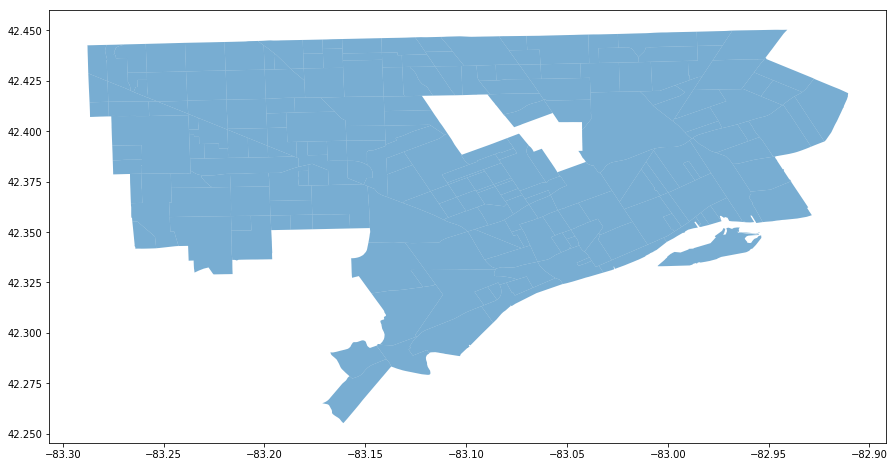

In [158]:

ax = DetroitNeighborhoods.plot(alpha=0.6,figsize = (15,16))
#f, ax = plt.subplots(1,figsize = (15,16))
plt.show

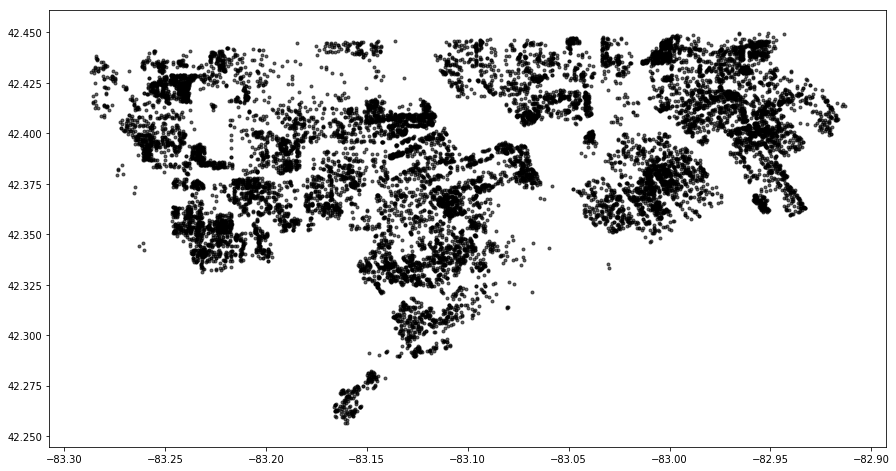

In [159]:

f, ax = plt.subplots(1,figsize = (15,16))
gdf.plot(c='k',marker='.',ax=ax, alpha=0.6)
plt.show()

In [ ]:
#type(demGeo['geometry'])
demGeo.dtypes

In [ ]:
#demGeo

demGeo = pd.DataFrame(columns=['geometry'], dtype=float)

<script>console.log("hello");</script>